In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-stress-detection-in-and-through-sleep/SaYoPillow.csv
/kaggle/input/human-stress-detection-in-and-through-sleep/IEEE-TCE_2020-08-0175_SaYoPillow.pdf
/kaggle/input/human-stress-detection-in-and-through-sleep/readme.docx


In [2]:
rs = 42
#Reading Dataset
veri = pd.read_csv("../input/human-stress-detection-in-and-through-sleep/SaYoPillow.csv")
veri.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [3]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


sr      0.975322
rr      0.963516
t      -0.962354
lm      0.971071
bo     -0.961092
rem     0.951988
sr.1   -0.973036
hr      0.963516
sl      1.000000
Name: sl, dtype: float64

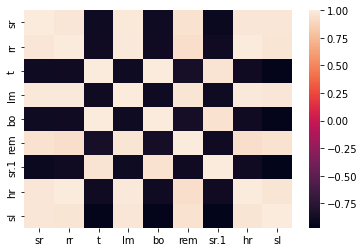

In [4]:
#Correalation
corr = veri.corr()
sns.heatmap(corr)
corr = corr.iloc[:,-1]
corr

In [5]:
#Visualition
#sns.lmplot("hr","sl",data = veri)

In [6]:
#Separating
X = veri.iloc[:,:8]
Y = veri["sl"]
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state = 42)

In [7]:
mms = MinMaxScaler()
xtrain_s = mms.fit_transform(xtrain)
xtest_s = mms.fit_transform(xtest)

In [8]:
knn = KNeighborsClassifier()
svc = SVC()
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
lr = LogisticRegression()

knn.fit(xtrain_s,ytrain)
svc.fit(xtrain_s,ytrain)
dtc.fit(xtrain_s,ytrain)
rfc.fit(xtrain_s,ytrain)
lr.fit(xtrain_s,ytrain)

lrp = lr.predict(xtest_s)
knnp = knn.predict(xtest_s)
rfcp = rfc.predict(xtest_s)
dtcp = dtc.predict(xtest_s)
svcp = svc.predict(xtest_s)

predicts = [lrp,svcp,knnp,rfcp,dtcp]

for i in predicts:
    a = accuracy_score(i,ytest)
    print("Accuracy score :",a)
for j in predicts:   
    b = balanced_accuracy_score(j,ytest)
    print("Balanced accuracy score :",b)    

Accuracy score : 1.0
Accuracy score : 1.0
Accuracy score : 1.0
Accuracy score : 0.9761904761904762
Accuracy score : 0.9761904761904762
Balanced accuracy score : 1.0
Balanced accuracy score : 1.0
Balanced accuracy score : 1.0
Balanced accuracy score : 0.9770778072502211
Balanced accuracy score : 0.9770778072502211
